<a href="https://colab.research.google.com/github/AhmedButtar7/ML_Assignment/blob/main/Car_Prediction_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Car Prediction Model using Linear and Lasso Refression Model**

In [1]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# Data Collection and Preprocessing
car_dataset = pd.read_csv('/content/car data.csv')
print(car_dataset.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [4]:
# printing total data items
car_dataset.shape

(301, 9)

In [5]:
# Getting information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Checking null items
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [10]:
# Checking distribution of catagorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
car_dataset.Transmission.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


,count
Transmission,
Manual,261
Automatic,40


In [20]:
# label encoding the catagorical data

# Fuel_type
car_dataset.replace({"Fuel_Type":{"Petrol":1, "Diesel": 1, "CNG": 3}}, inplace = True)

In [21]:
# Seller_type encoding

car_dataset.replace({"Seller_Type":{"Dealer":0,"Individual":1 }}, inplace = True
)

In [31]:
# Encoding the transmission column
car_dataset.replace({"Transmission":{"Manual":0, "Automatic":1}}, inplace = True)

In [32]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,1,0,0,0
3,wagon r,2011,2.85,4.15,5200,1,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [33]:
# Splitting the data into train and test
X = car_dataset.drop(['Car_Name','Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

In [34]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          1            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          1            0             0   
3    2011           4.15        5200          1            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          1            0             0   
298  2009          11.00       87934          1            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          1            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [35]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [36]:
# Splitting the data into x train y train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=2, test_size=0.1)

In [37]:
# Loading the Linear Regression model
Linear_model = LinearRegression()

In [38]:
Linear_model.fit(X_train,Y_train)

LinearRegression()

In [40]:
# Prediction on Training Data
Train_presiction = Linear_model.predict(X_train)

In [41]:
# R squeare error

In [43]:
error_score = metrics.r2_score(Y_train, Train_presiction)
print("R Squared score is :", error_score)

R Squared score is : 0.8656340997773306


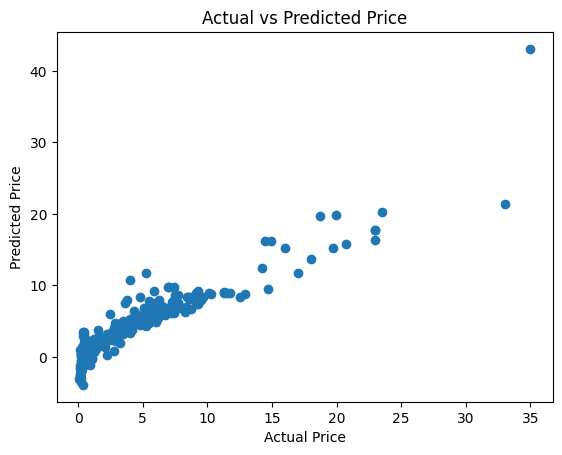

In [44]:
plt.scatter(Y_train, Train_presiction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [47]:
# Checking prediction for test data

Test_accuracy = Linear_model.predict(X_test)


In [49]:
# Checking error score
error = metrics.r2_score(Y_test,Test_accuracy)
print("R Squared score for train data ", error)

R Squared score for train data  0.8788963152121584


Checking the Lasso Regression Model


In [50]:
Lasso_model = Lasso()

In [51]:
Lasso_model.fit(X_train,Y_train)

Lasso()

In [52]:
# Predicting the train data
Train_prediction = Lasso_model.predict(X_train)

In [53]:
# Checking the r squared score
score = metrics.r2_score(Y_train, Train_prediction)
print('R Squared Score is :', score)

R Squared Score is : 0.8427856123435794


In [54]:
# Predicting the test data
Test_prediction = Lasso_model.predict(X_test)

In [55]:
# Checking the score for test
score = metrics.r2_score(Y_test,Test_prediction)
print("Score for test data is ", score)

Score for test data is  0.8709167941173195


In [56]:
# Visiualizing the data

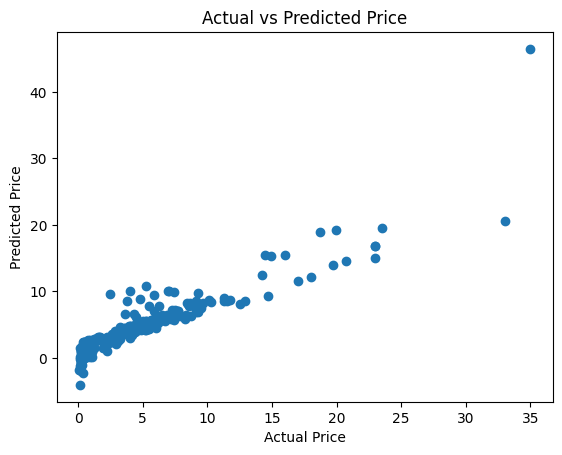

In [57]:
plt.scatter(Y_train, Train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

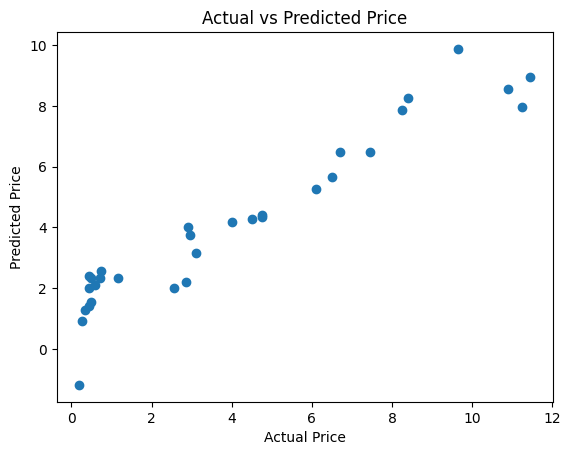

In [59]:
plt.scatter(Y_test, Test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()